In [1]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

import matplotlib.pyplot as plt #Data Visualization

import seaborn as sns #Data Visualization

import tensorflow as tf # a framework used for building and training deep learning models

import keras #Keras is an open-source high-level neural networks API 

from keras.preprocessing import image #used for loading, preprocessing, and augmenting images before feeding to neural network

from keras.models import Sequential

from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization

from tensorflow.keras.preprocessing.image import ImageDataGenerator #tool for real-time data augmentation and preprocessing of image data during model training.

import cv2

from keras import regularizers# Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function.

from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax #optimizers are algorithms or methods used to adjust the weights and biases of a neural network during training

2024-03-26 14:06:48.005049: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-26 14:06:48.005189: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-26 14:06:48.174804: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
img_size=224
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255, # Images are rescaled by a factor of 1./255.
                                         validation_split = 0.2
                                        )


In [4]:
#  using the flow_from_directory method of ImageDataGenerator to generate data batches for training and validation.

train_generator = train_datagen.flow_from_directory(directory = '/kaggle/input/plantdisease/PlantVillage',
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "rgb", #Specifies the color mode of the images.
                                                    class_mode = "categorical", #The type of label arrays that are returned
                                                    subset = "training" #Specifies whether the generator is used for training or validation.
                                                   )
validation_generator = train_datagen.flow_from_directory( directory = '/kaggle/input/plantdisease/PlantVillage',
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "rgb",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


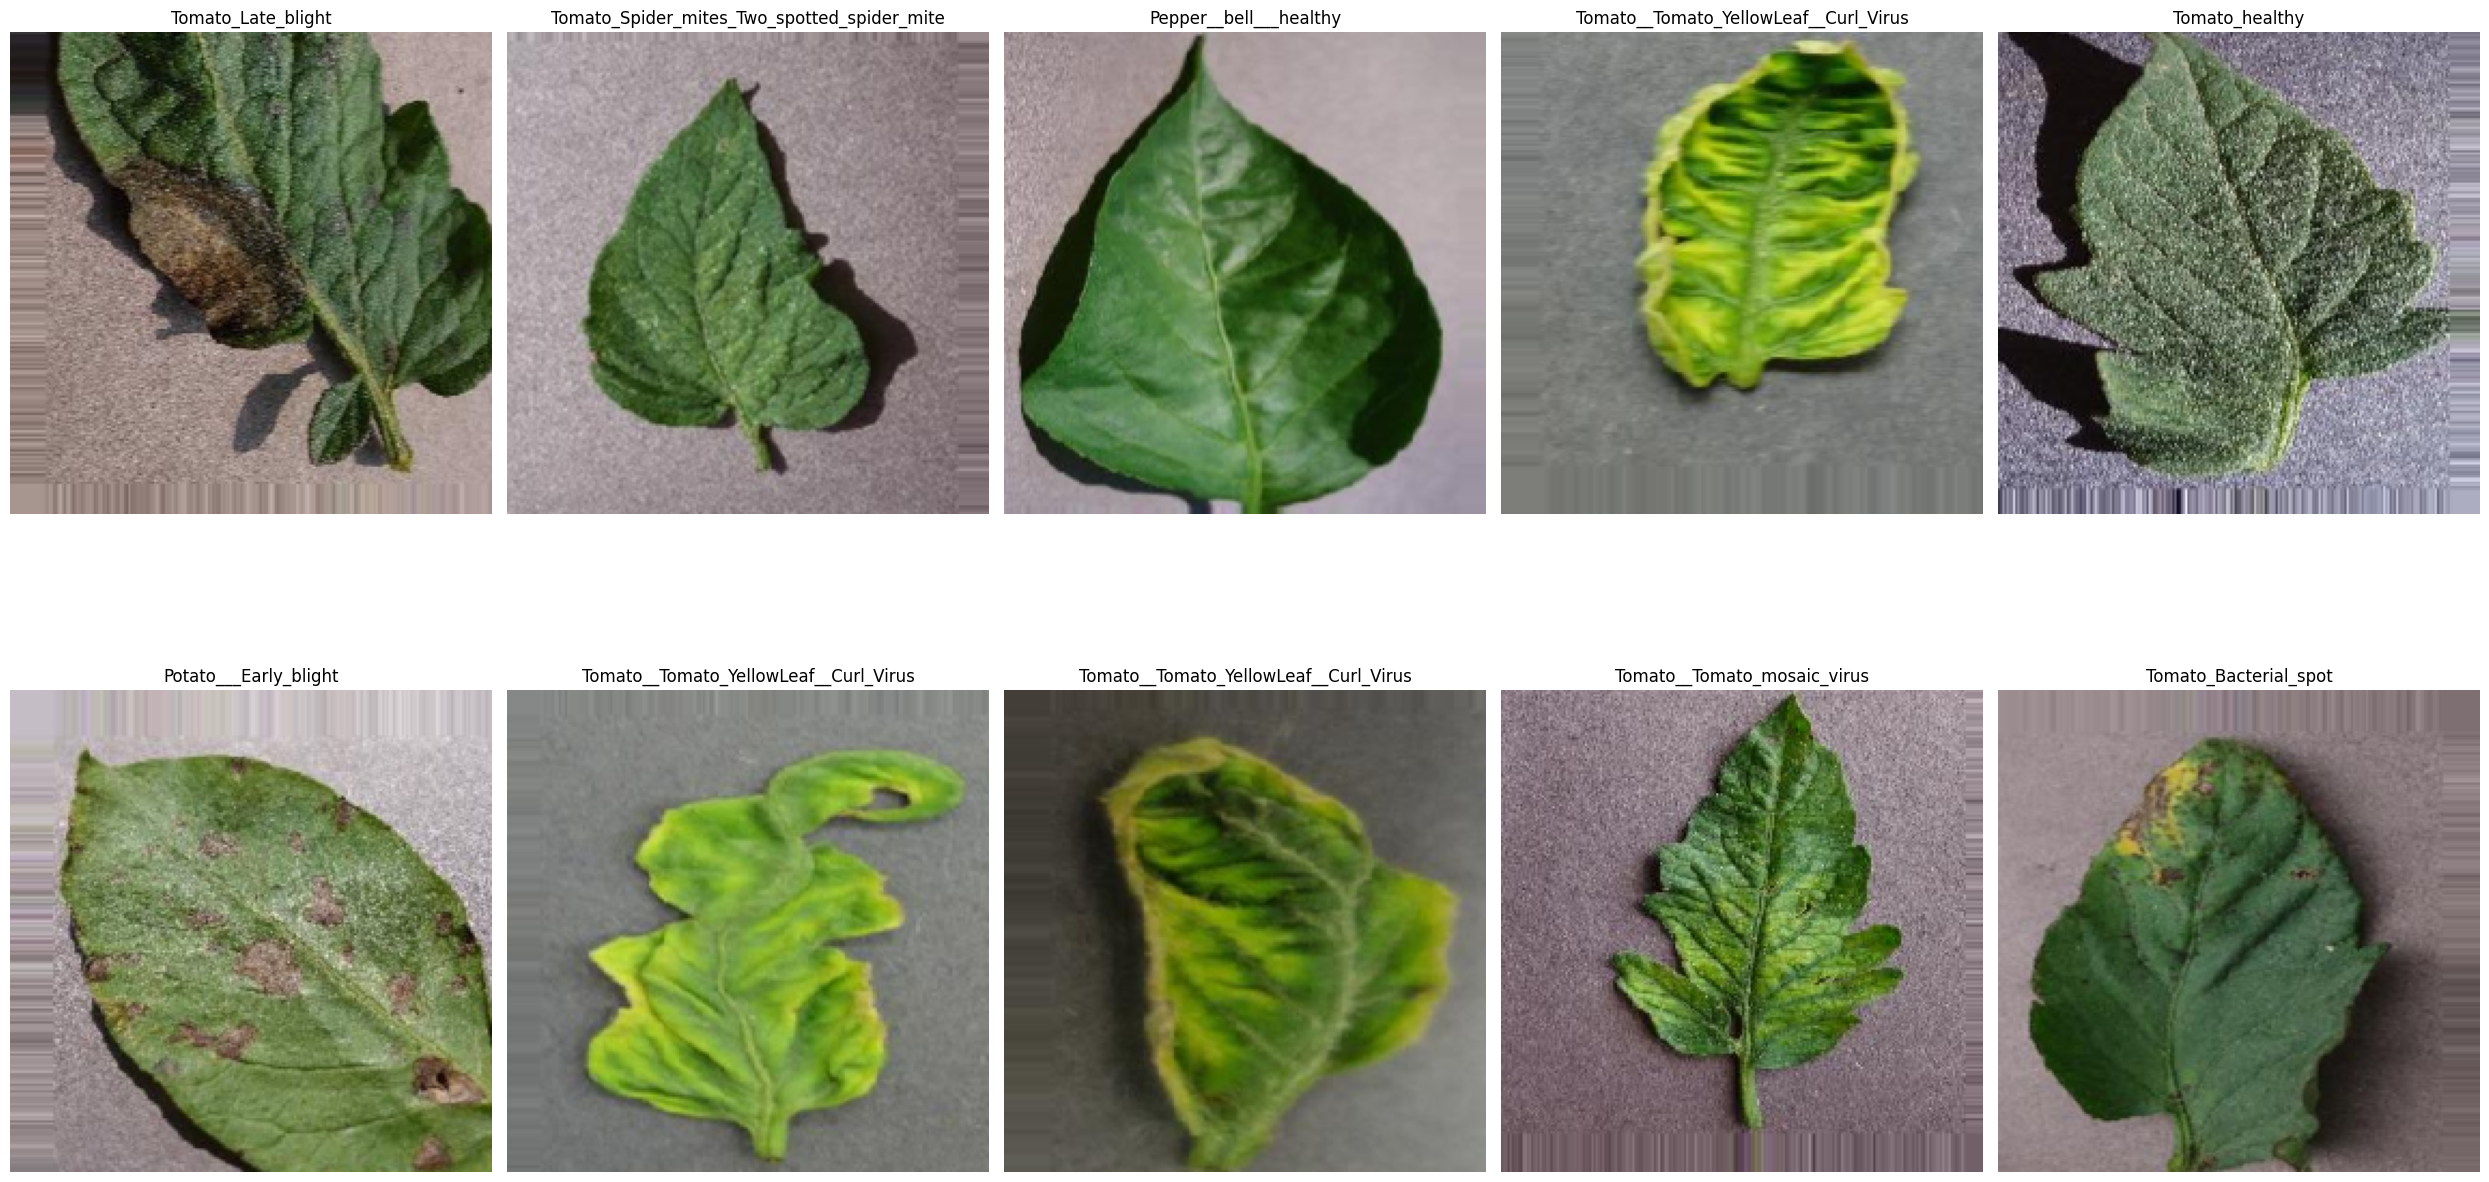

In [7]:
# Display some sample images from the dataset along with their labels

# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Get a batch of images and labels
sample_images, sample_labels = next(train_generator)

# Plot the images
plt.figure(figsize=(25, 15))
for i in range(10):  # Change 10 to however many examples you want to show
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title(class_labels[np.argmax(sample_labels[i])])
    plt.axis("off")
plt.tight_layout()
plt.show()


In [5]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import Input



base_model = VGG19(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(120, activation='relu')(x)
x = Dense(84, activation='relu')(x)
predictions = Dense(15, activation='softmax')(x) 


model = Model(inputs=base_model.input, outputs=predictions)


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     3,010,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,16

 Total params: 23,046,503 (87.92 MB)

 Trainable params: 3,022,119 (11.53 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [6]:

history = model.fit(train_generator, validation_data=validation_generator, epochs=50)



Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1711445178.621410     119 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711445178.642321     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5330 - loss: 1.5579

W0000 00:00:1711445468.402417     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


259/259 ━━━━━━━━━━━━━━━━━━━━ 457s 2s/step - accuracy: 0.5335 - loss: 1.5559 - val_accuracy: 0.7433 - val_loss: 0.7400
Epoch 2/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 230s 870ms/step - accuracy: 0.8059 - loss: 0.5809 - val_accuracy: 0.8418 - val_loss: 0.4615
Epoch 3/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 231s 873ms/step - accuracy: 0.8502 - loss: 0.4358 - val_accuracy: 0.8481 - val_loss: 0.4557
Epoch 4/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 232s 877ms/step - accuracy: 0.8634 - loss: 0.3911 - val_accuracy: 0.8544 - val_loss: 0.4344
Epoch 5/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 231s 872ms/step - accuracy: 0.8813 - loss: 0.3491 - val_accuracy: 0.8671 - val_loss: 0.3915
Epoch 6/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 232s 879ms/step - accuracy: 0.8911 - loss: 0.3232 - val_accuracy: 0.8903 - val_loss: 0.3148
Epoch 7/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 229s 867ms/step - accuracy: 0.9011 - loss: 0.2914 - val_accuracy: 0.8896 - val_loss: 0.3208
Epoch 8/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 230s 868ms/step - accuracy: 0.9039 - loss: 0.2817 

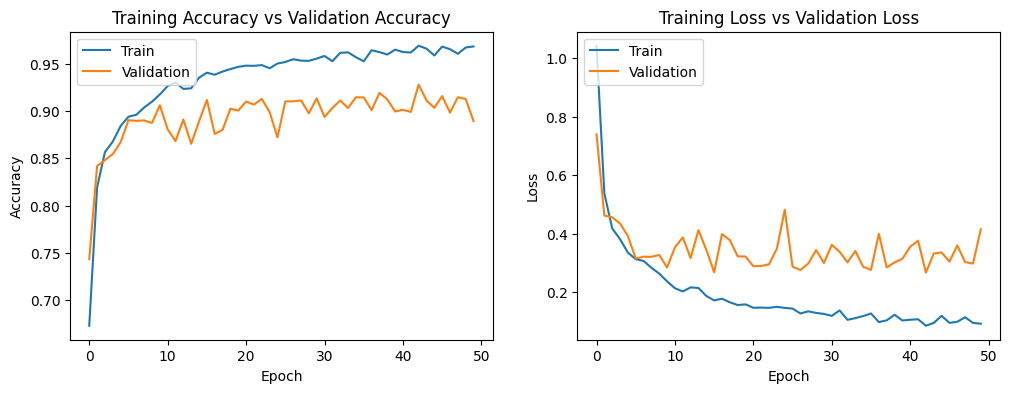

In [8]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [9]:
# Extract accuracy values
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get the final accuracy after the last epoch
final_train_accuracy = train_accuracy[-1]
final_val_accuracy = val_accuracy[-1]

print("Final training accuracy:", final_train_accuracy)
print("Final validation accuracy:", final_val_accuracy)


Final training accuracy: 0.9682731628417969
Final validation accuracy: 0.8893740773200989
